# **Neste projeto de Data Science vamos avaliar o desempenho de um aluno utilizando técnicas de Machine Learning e python**

Para ler o conjunto de dados:

In [ ]:
from google.colab import files
uploaded = files.upload()

Vamos começar importando as bibliotecas:

In [ ]:
pip install dabl

In [ ]:
# para algumas operações básicas
import numpy as np
import pandas as pd

# para visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')

# obtendo a forma dos dados
print(data.shape)

Para ver os primeiros 5 registros no conjunto de dados

In [ ]:
data.head()

**Estatísticas descritivas**

In [ ]:
data.describe()

In [ ]:
data.columns

Vamos verificar o número de itens exclusivos presentes na coluna categórica



In [ ]:
data.select_dtypes('object').nunique()

Vamos verificar a porcentagem de dados ausentes em cada coluna presente nos dados:

In [ ]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

Para ver a comparação de todos os outros atributos em relação às Pontuações Matemáticas

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Comparação de todos os outros atributos em relação às Marcas de Leitura:

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Vamos verificar o efeito do almoço no desempenho do aluno

In [ ]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

Observamos que (free/reduced) ou (Standard) a mulher teve uma menor aproveitamento que o homem, tanto no score de escrita como de leitura. Isto quer dizer que tanto após almoço quanto em momentos durante ao dia os homens tem mais rendimentos que as mulheres em Machine Learning.

Vamos verificar o efeito do curso de preparação para o teste nas pontuações

In [ ]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

Aqui também pelo agrupamento que as mulheres mesmos pontuando mais na escrita e na leitura não tiveram uma pontuação alta final boa.

**Visualizações de dados**

Visualizando o número de homens e mulheres no conjunto de dados

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Visualizando os diferentes grupos no conjunto de dados

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'BuPu')
plt.title('Comparação de vários grupos', fontweight = 30, fontsize = 20)
plt.xlabel('Grupos')
plt.ylabel('Total')
plt.show()

Visualizando os diferentes níveis de educação dos pais

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Nível de escolaridade dos pais
sns.countplot(data['parental level of education'], palette = 'BuPu')
plt.title('Comparação da Educação dos Pais', fontweight = 30, fontsize = 20)
plt.xlabel('Grau')
plt.ylabel('Total')
plt.show()

**Visualizing Maths score**

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparação de pontuação de matemática', fontweight = 30, fontsize = 20)
plt.xlabel('Pontuação')
plt.ylabel('Total')
plt.xticks(rotation = 90)
plt.show()

**Calculando a pontuação total para cada aluno**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'red')

plt.title('Comparação da pontuação total de todos os alunos', fontweight = 30, fontsize = 20)
plt.xlabel('Nota total dos alunos')
plt.ylabel('Total')
plt.show()

**Calculando a porcentagem para cada um dos alunos**

In [ ]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'blue')

plt.title('Comparação de porcentagem pontuada por todos os alunos', fontweight = 30, fontsize = 20)
plt.xlabel('Porcentagem pontuada')
plt.ylabel('Total')
plt.show()

In [ ]:
data

In [ ]:
data.columns

Atribuir **GRUPOS** às notas de acordo com os seguintes critérios:
  
*  00 - 40 pontos: **Grau E**
*  41 - 60 pontos: **Grau D** 
*  60 - 70 pontos: **Grau C**
*  70 - 80 pontos: **Grau B**
*  80 - 90 pontos: **Grau A**
*  90 - 100 pontos: **Grau O**

In [ ]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

In [ ]:
data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )
data['grades'].value_counts()

In [ ]:
data.columns

In [ ]:
data

**Codificação de Etiqueta**

https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning/

Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# criando um codificador
le_cod = LabelEncoder()

# codificação de etiquetas para curso de preparação para testes
data['test preparation course'] = le_cod.fit_transform(data['test preparation course'])

# codificação de rótulos para almoço
data['lunch'] = le_cod.fit_transform(data['lunch'])

# codificação de rótulo para raça/etnia
# temos que mapear valores para cada uma das categorias
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# codificação de rótulo para o nível de educação dos pais
data['parental level of education'] = le_cod.fit_transform(data['parental level of education'])

# codificação de rótulo para gender
data['gender'] = le_cod.fit_transform(data['gender'])

# codificação de rótulo para "math score"
data['math score'] = le_cod.fit_transform(data['math score'])

# codificação de rótulo para "reading score"
data['reading score'] = le_cod.fit_transform(data['reading score'])

# codificação de rótulo para "writing score"
data['writing score'] = le_cod.fit_transform(data['writing score'])


In [ ]:
data

**Preparação de dados**

Dividindo as variáveis dependentes e independentes

In [ ]:
x = data.iloc[:,:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

In [ ]:
x

In [ ]:
y

Dividindo o conjunto de dados em conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
# importando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# criando um escalonador
mm = MinMaxScaler()

# alimentando a variável independente no scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

**PCA - Aplicando a análise de componentes principais**

A Análise de Componentes Principais (em inglês PCA) é o nome comum dado à técnica que usa princípios de álgebra linear para transformar variáveis, possivelmente correlacionadas, em um número menor de variáveis chamadas de Componentes Principais (novamente em inglês PC).

A PCA é usada em diversas aplicações, desde a compressão de dados (MP3, JPG) até remoção de ruídos, passando pela análises de grande quantidade de dados.

In [ ]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# alimentando as variáveis independentes para o modelo PCA
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualizar os principais componentes que explicarão a maior parcela de variância
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# criando um modelo de análise de componentes principais
pca = PCA(n_components = 2)

# alimentando as variáveis independentes para o modelo PCA
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# **Modelagem**

# **Regressão Logística**

É uma técnica recomendada para situações em que a
variável dependente é de natureza categórica ou
binária. Quanto às independentes, tanto podem ser
categóricas ou não.

A **regressão logística** é um recurso que nos permite estimar
a probabilidade associada à ocorrência de determinado
evento em face de um conjunto de variáveis explanatórias.

**Vantagens do Modelo Logístico**

* Facilidade para lidar com variáveis independentes
categóricas.
* Fornece resultados em termos de probabilidade.
* Facilidade de classificação de indivíduos em
categorias.
* Requer pequeno número de suposições.
Alto grau de confiabilidade.

In [ ]:
from sklearn.linear_model import  LogisticRegression
import pickle

# criando um modelo
model = LogisticRegression()

# alimentando os dados de treinamento para o modelo
model.fit(x_train, y_train)

# prever os resultados do conjunto de teste
y_pred = model.predict(x_test)

# calcular as precisões de classificação
print("Precisão do treinamento :", model.score(x_train, y_train))
print("Teste de precisão :", model.score(x_test, y_test))

In [ ]:
uploaded = files.upload()

Saving finalized_model_log_reg.pkl to finalized_model_log_reg.pkl


Salvar o modelo no **disco**

In [ ]:
filename = 'finalized_model_log_reg.pkl'
pickle.dump(model, open(filename, 'wb'))

Carregar o modelo do **disco** e realizar um teste

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)

# Aqui o teste com o mesmo modelo só que carregando o modelo do disco
print("Precisão do treinamento :", model.score(x_train, y_train))
print("Teste de precisão :", model.score(x_test, y_test))

Printing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# criando uma matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# imprimindo a matriz de confusão
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Matriz de Confusão para Regressão Logística', fontweight = 30, fontsize = 20)
plt.show()

Atribuir **GRUPOS** às notas de acordo com os seguintes critérios:
  
*  00 - 40 pontos: **Grau E = 5**
*  41 - 60 pontos: **Grau D = 4** 
*  60 - 70 pontos: **Grau C = 3**
*  70 - 80 pontos: **Grau B = 2**
*  80 - 90 pontos: **Grau A = 1**
*  90 - 100 pontos: **Grau O = 0**

# **Random Forest (Floresta Aleatória)**

Este nome explica muito bem o funcionamento do algoritmo.

O algoritmo cria de forma aleatória várias **Árvores de Decisão** (Decision Trees) e combina o resultado de todas elas para chegar no resultado final. 

Por sua vez, árvores de decisão são estruturas de predição mais simples que, de maneira geral, criam uma estrutura parecida com uma árvore onde os ramos são os diferentes “caminhos” que o algoritmo toma para chegar no valor previsto.

Uma vantagem de utilizar o algoritmo Random Forest é que, além dele ser muito poderoso, ele retorna de maneira muito compreensiva a importância atribuída para cada variável independente na hora de realizar as predições.

Com isso, é possível medir o impacto de cada questão no resultado final. 

Entretanto, a desvantagem é que por ser um algoritmo de aprendizado supervisionado, é preciso que seja fornecida uma variável resposta, ou seja, uma única variável pode ser prevista.

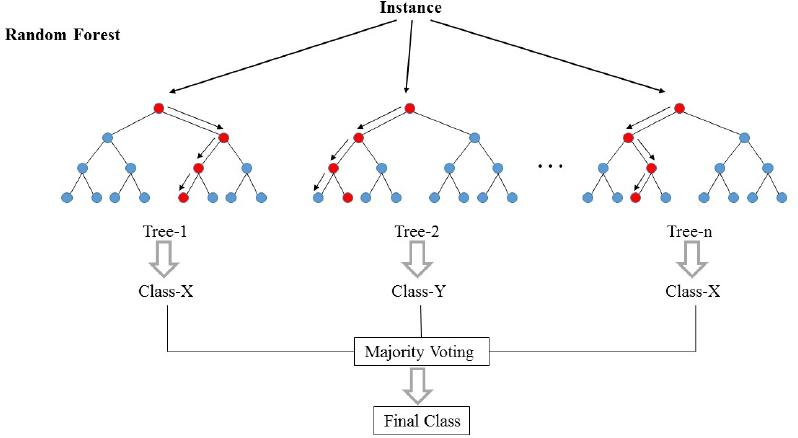

# **Aplicações do Random Forest**

No setor **bancário** ele é utilizado para detectar clientes que irão utilizar os serviços bancários mais frequentemente que outros e pagar suas dívidas pontualmente, detectar fraudes de clientes que querem lesar o banco, etc.

No setor **financeiro**, ele é utilizado para determinar o desempenho futuro de uma ação.

Na área de **saúde** é utilizado para analisar o histórico médico de um paciente para identificar doenças.

Por último, no comércio **eletrônico** é utilizado para determinar se um cliente irá gostar do produto ou não e outras inúmeras utilidades.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# criando um modelo
model = RandomForestClassifier()

# alimentando os dados de treinamento para o modelo
model.fit(x_train, y_train)

# prever os resultados do teste x
y_pred = model.predict(x_test)

# cálculo de precisão
print("Precisão do treinamento :", model.score(x_train, y_train))
print("Teste de precisão :", model.score(x_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix

# criando uma matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# imprimindo a matriz de confusão
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Matriz de Confusão para Floresta Aleatória', fontweight = 30, fontsize = 20)
plt.show()

Atribuir **GRUPOS** às notas de acordo com os seguintes critérios:
  
*  00 - 40 pontos: **Grau E = 5**
*  41 - 60 pontos: **Grau D = 4** 
*  60 - 70 pontos: **Grau C = 3**
*  70 - 80 pontos: **Grau B = 2**
*  80 - 90 pontos: **Grau A = 1**
*  90 - 100 pontos: **Grau O = 0**

In [ ]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Visualização Radial para Alvo', fontsize = 20)
plt.show()

Dá uma ideia clara de que os alunos com notas muito baixas têm alta correlação no almoço e na educação dos pais